In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
sns.set_style('white')
%matplotlib inline
import warnings
#supress all types of warning/to manage warning
warnings.filterwarnings("ignore")

#load first file
column_names=['user_id','item_id','rating','timestamp']
path='file.tsv'
df=pd.read_csv(path,sep='\t',names=column_names)
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [5]:
#load second file
movie_titles=pd.read_csv("MovieTitles.csv")
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [7]:
data=pd.merge(df,movie_titles,on='item_id') #merge two tables on the basis of same coln name
data.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,0,172,5,881250949,"Empire Strikes Back, The (1980)"
2,0,133,1,881250949,Gone with the Wind (1939)
3,196,242,3,881250949,Kolya (1996)
4,186,302,3,891717742,L.A. Confidential (1997)


In [9]:
#calculate mean ratings of all movies
data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [11]:
#Calculate count rating of all movies
data.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [13]:
#creating dataframe with 'rating' count values
ratings=pd.DataFrame(data.groupby('title')['rating'].mean())
ratings['num of ratings']=pd.DataFrame(data.groupby('title')['rating'].count())
print(ratings)

                                         rating  num of ratings
title                                                          
'Til There Was You (1997)              2.333333               9
1-900 (1994)                           2.600000               5
101 Dalmatians (1996)                  2.908257             109
12 Angry Men (1957)                    4.344000             125
187 (1997)                             3.024390              41
...                                         ...             ...
Young Guns II (1990)                   2.772727              44
Young Poisoner's Handbook, The (1995)  3.341463              41
Zeus and Roxanne (1997)                2.166667               6
unknown                                3.444444               9
Á köldum klaka (Cold Fever) (1994)     3.000000               1

[1664 rows x 2 columns]


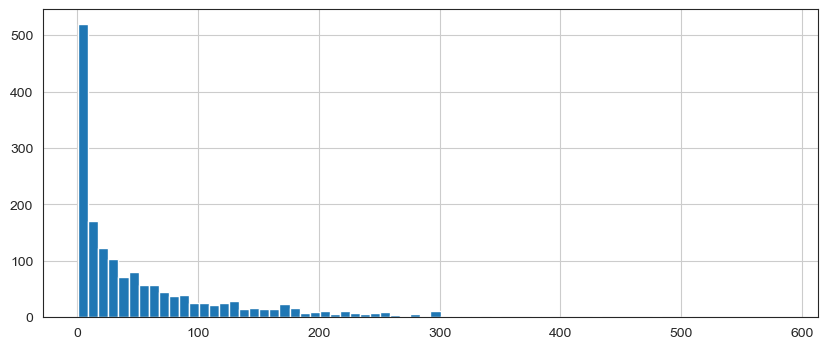

In [15]:
#plot graph of 'num of ratings column'
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)
plt.show()

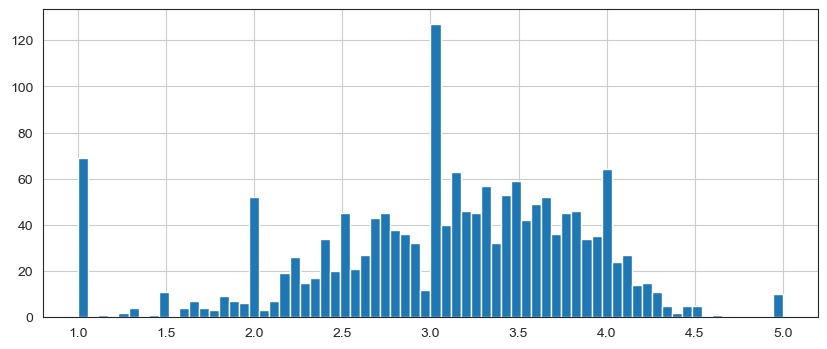

In [17]:
#plot graph of 'num of ratings column'
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)
plt.show()

In [19]:
#Sorting values according to the 'num of rating column'
moviemat=data.pivot_table(index='user_id',columns='title',values='rating')
moviemat.head()
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [21]:
#analysing correlation with similar movies
starwars_user_ratings=moviemat['Star Wars (1977)']
liarliar_user_ratings=moviemat['Liar Liar (1997)']
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [23]:
#analysis correlation with similar movies
similar_to_starwars=moviemat.corrwith(starwars_user_ratings)
similar_to_liarliar=moviemat.corrwith(liarliar_user_ratings)
corr_starwars=pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [25]:
#analysis correlation with similar movies
similar_to_starwars=moviemat.corrwith(starwars_user_ratings)
similar_to_liarliar=moviemat.corrwith(liarliar_user_ratings)
corr_liarliar=pd.DataFrame(similar_to_liarliar,columns=['Correlation'])
corr_liarliar.dropna(inplace=True)
corr_liarliar.head()

,Correlation
title,
'Til There Was You (1997),0.118913
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145
2 Days in the Valley (1996),0.040739


In [27]:
#Similar movies like starwars
corr_starwars.sort_values('Correlation',ascending=False).head(10)
corr_starwars=corr_starwars.join(ratings['num of ratings'])
corr_starwars.head()
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [29]:
#Similar movies as of liarliar
corr_liarliar=pd.DataFrame(similar_to_liarliar,columns=['Correlation'])
corr_liarliar.dropna(inplace=True)
corr_liarliar=corr_liarliar.join(ratings['num of ratings'])
corr_liarliar[corr_liarliar['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137


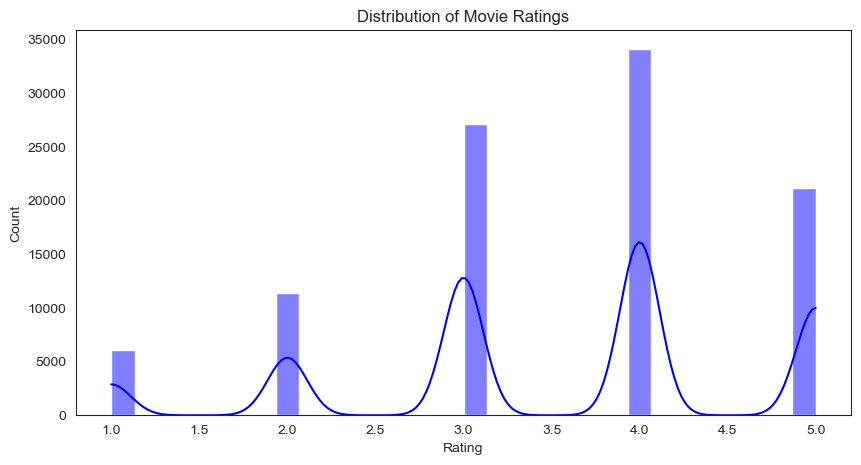

In [31]:
plt.figure(figsize=(10,5))
sns.histplot(data['rating'],bins=30,kde=True,color='blue')
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

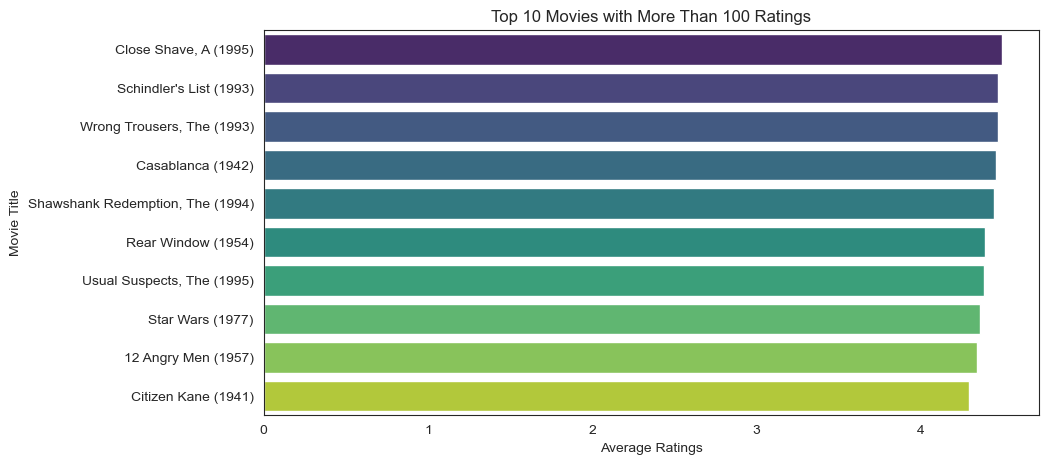

In [33]:
#Top 10 movies with more than 100 ratings
threshold=100
popular_movies=ratings[ratings['num of ratings']>threshold].sort_values('rating',ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=popular_movies['rating'],y=popular_movies.index,palette="viridis")
plt.title(f"Top 10 Movies with More Than {threshold} Ratings")
plt.xlabel("Average Ratings")
plt.ylabel("Movie Title")
plt.show()

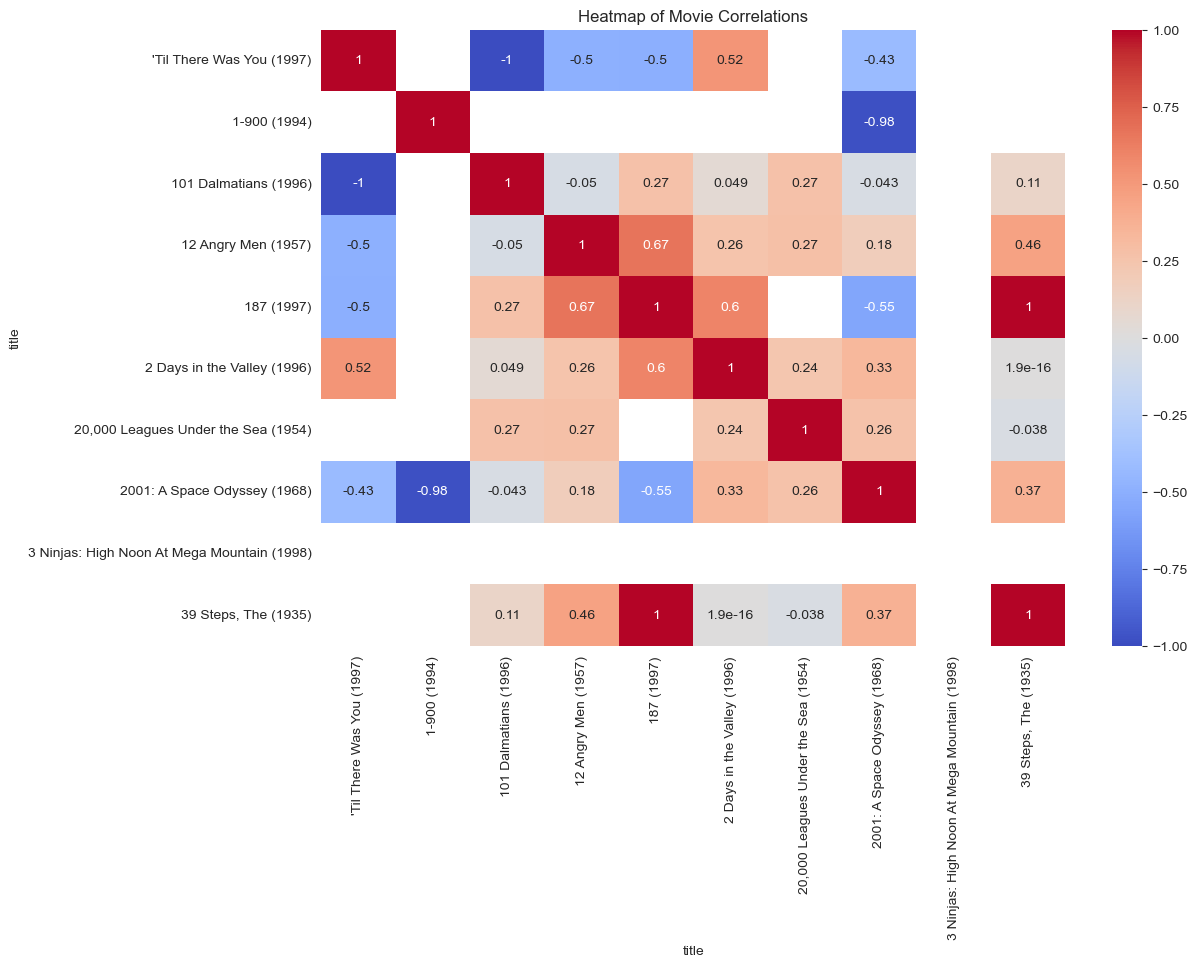

In [35]:
#HEATMAP OF MOVIE CORRELATION
popular_movies=moviemat.corr().iloc[:10,:10]#Correlation matrix for top 10 movies
plt.figure(figsize=(12,8))
sns.heatmap(popular_movies,annot=True,cmap="coolwarm")
plt.title("Heatmap of Movie Correlations")
plt.show()

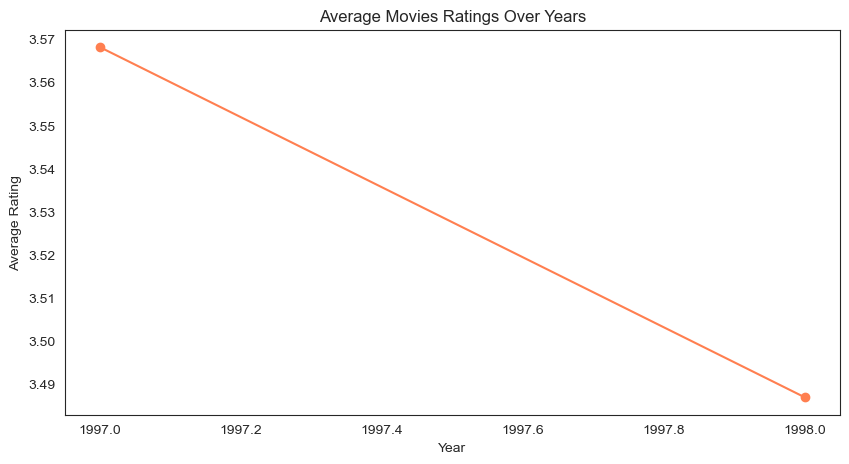

In [37]:
data['year']=pd.to_datetime(data['timestamp'],unit='s').dt.year
yearly_avg_ratings=data.groupby('year')['rating'].mean()

plt.figure(figsize=(10,5))
plt.plot(yearly_avg_ratings.index,yearly_avg_ratings.values,marker='o',color='coral')
plt.title("Average Movies Ratings Over Years")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.show()

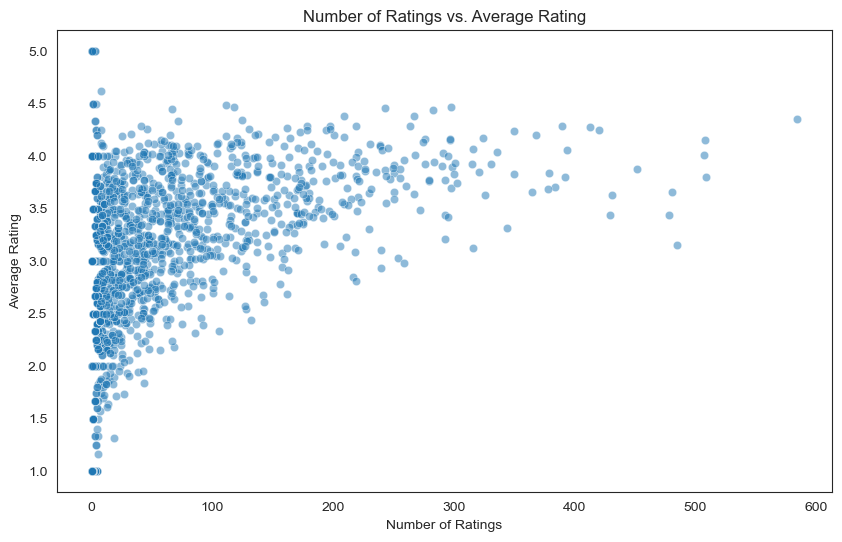

In [39]:
#NUMBER OF RATINGS VS AVG RATINGS
plt.figure(figsize=(10,6))
sns.scatterplot(x=ratings['num of ratings'],y=ratings['rating'],alpha=0.5)
plt.title("Number of Ratings vs. Average Rating")
plt.xlabel("Number of Ratings")
plt.ylabel("Average Rating")
plt.show()

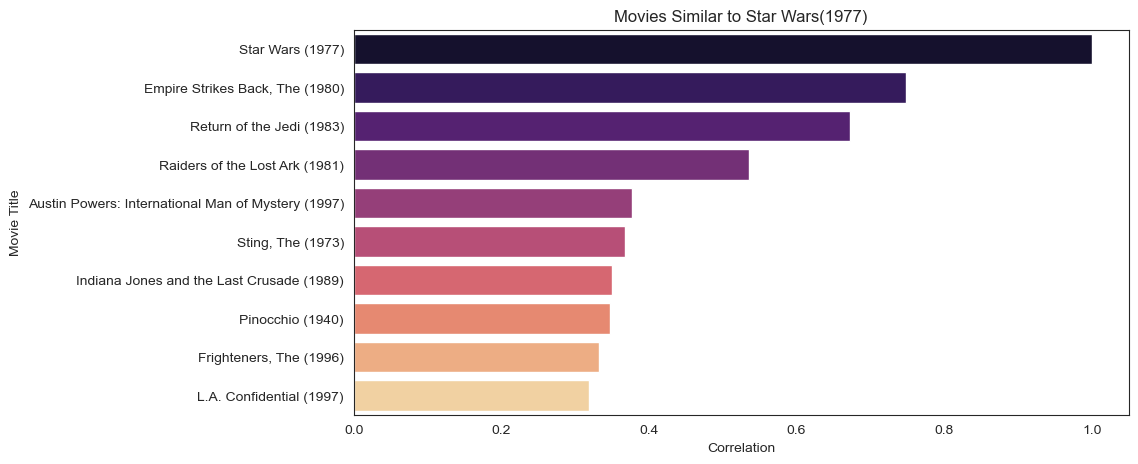

In [41]:
#MOVIES SIMILAR TO STAR WARS
top_corr=corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation',ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_corr['Correlation'],y=top_corr.index,palette="magma")
plt.title("Movies Similar to Star Wars(1977)")
plt.xlabel("Correlation")
plt.ylabel("Movie Title")
plt.show()

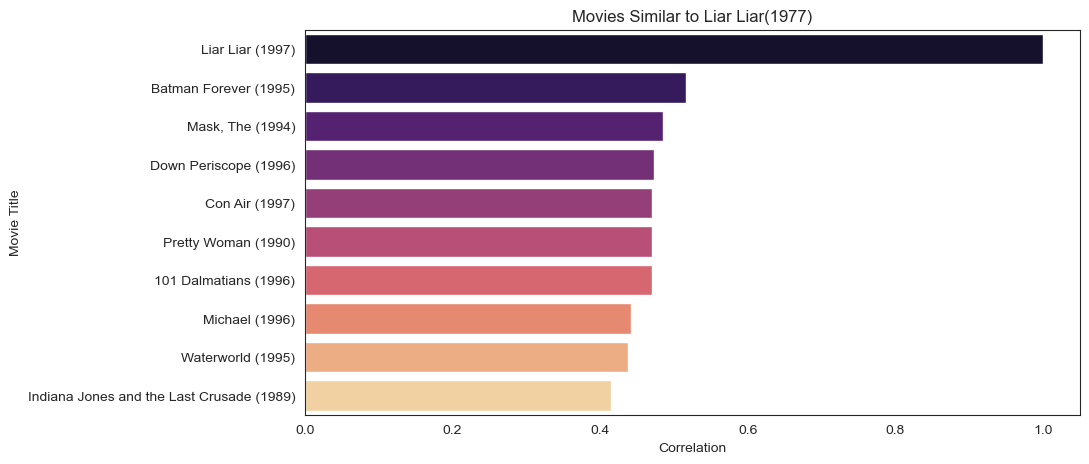

In [43]:
#MOVIES SIMILAR TO LIAR LIAR
top_corr=corr_liarliar[corr_liarliar['num of ratings']>100].sort_values('Correlation',ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_corr['Correlation'],y=top_corr.index,palette="magma")
plt.title("Movies Similar to Liar Liar(1977)")
plt.xlabel("Correlation")
plt.ylabel("Movie Title")
plt.show()